In [34]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [35]:
ticker = 'TAEE11.SA'
start = dt.datetime(2018,1,1)
end = dt.datetime.now()

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

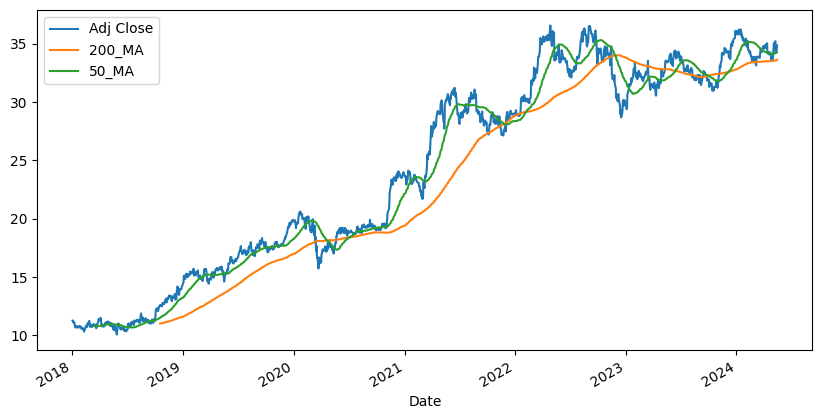

In [36]:
# load taesa11 data
taesa11 = yf.download(ticker, start, end)

# calculate 50-day moving average
taesa11['50_MA'] = taesa11['Adj Close'].rolling(window=50).mean()

# calculate 50-day moving average
taesa11['200_MA'] = taesa11['Adj Close'].rolling(200).mean()

# plot the closing price and moving average
taesa11[['Adj Close','200_MA', '50_MA']].plot(figsize=(10, 5))

In [37]:
taesa11 = taesa11.dropna()
taesa11

,Open,High,Low,Close,Adj Close,Volume,50_MA,200_MA
Date,,,,,,,,
2018-10-18,22.000000,22.510000,21.879999,22.100000,12.602710,2131700,11.522904,11.016119
2018-10-19,22.389999,22.389999,21.950001,22.000000,12.545683,4539000,11.548105,11.022518
2018-10-22,22.190001,22.280001,21.830000,22.000000,12.545683,2021200,11.574532,11.028838
2018-10-23,21.990000,22.100000,21.760000,21.969999,12.528573,2258700,11.603843,11.035965
2018-10-24,21.969999,22.150000,21.830000,21.900000,12.488651,1819800,11.630189,11.042630
...,...,...,...,...,...,...,...,...
2024-05-08,35.380001,35.689999,35.369999,35.650002,35.221600,2210500,34.225190,33.590763
2024-05-09,35.610001,35.619999,34.610001,34.810001,34.391693,4533700,34.236170,33.599454
2024-05-10,35.000000,35.230000,34.619999,34.619999,34.203976,3272700,34.249715,33.606350


In [38]:
# Calculate RSI indicator

delta = taesa11['Adj Close'].diff(1)
delta.dropna(inplace = True)

positive = delta.copy()
negative = delta.copy()

positive[positive < 0] = 0
negative[negative > 0] = 0

days = 30

average_gain = positive.rolling(window=days).mean()
average_loss = abs(negative.rolling(window=days).mean())

relative_strengh = average_gain / average_loss

rsi = 100.0 - (100.0 / (1.0 + relative_strengh))

combined = pd.DataFrame()
combined['Adj Close'] = taesa11['Adj Close']
combined['RSI'] = rsi


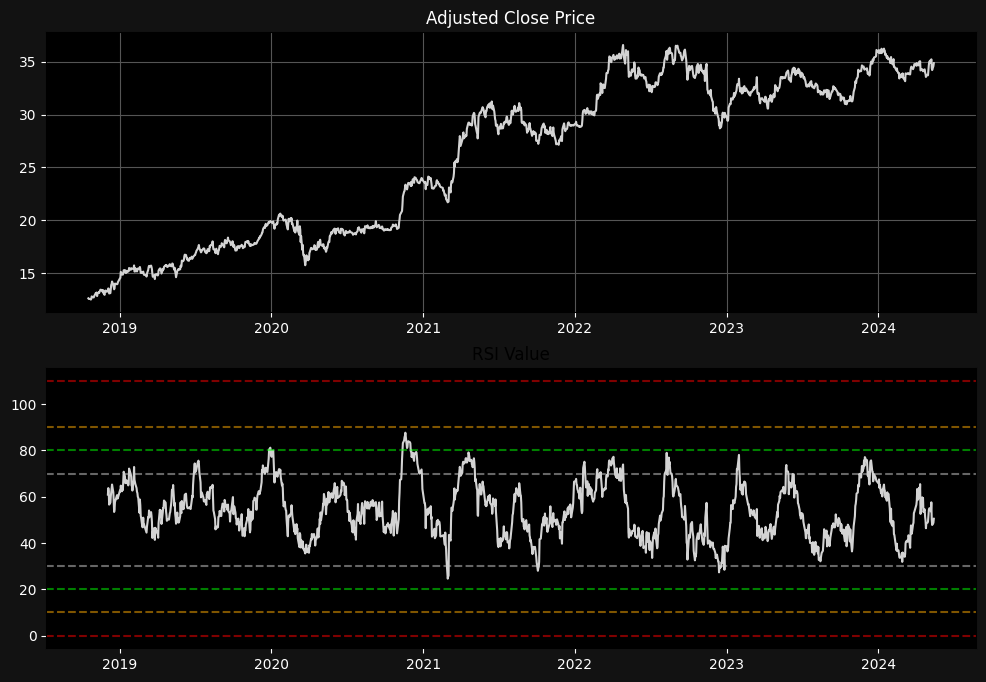

In [39]:
# plot visualization

plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax1.plot(combined.index, combined['Adj Close'], color='lightgray')
ax1.set_title('Adjusted Close Price', color='white')

ax1.grid(True, color='#555555')
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(combined.index, combined['RSI'], color='lightgray')
ax2.axhline(0, linestyle='--', alpha= 0.5, color='#ff0000')
ax2.axhline(10, linestyle='--', alpha= 0.5, color='#ffaa00')
ax2.axhline(20, linestyle='--', alpha= 0.5, color='#00ff00')
ax2.axhline(30, linestyle='--', alpha= 0.5, color='#cccccc')
ax2.axhline(70, linestyle='--', alpha= 0.5, color='#cccccc')
ax2.axhline(80, linestyle='--', alpha= 0.5, color='#00ff00')
ax2.axhline(90, linestyle='--', alpha= 0.5, color='#ffaa00')
ax2.axhline(110, linestyle='--', alpha= 0.5, color='#ff0000')

ax2.set_title('RSI Value')
ax2.grid(False)
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')

Bollinger Bands consists of:

- Simple moving average
- Lower and Upper Band using Standard Deviation 

Standard Deviation (Sigma) is a measure of variance. Bollinger Bands usually use 2 Sigmas which 95% of all price within the Bands

In [40]:
taesa11

,Open,High,Low,Close,Adj Close,Volume,50_MA,200_MA
Date,,,,,,,,
2018-10-18,22.000000,22.510000,21.879999,22.100000,12.602710,2131700,11.522904,11.016119
2018-10-19,22.389999,22.389999,21.950001,22.000000,12.545683,4539000,11.548105,11.022518
2018-10-22,22.190001,22.280001,21.830000,22.000000,12.545683,2021200,11.574532,11.028838
2018-10-23,21.990000,22.100000,21.760000,21.969999,12.528573,2258700,11.603843,11.035965
2018-10-24,21.969999,22.150000,21.830000,21.900000,12.488651,1819800,11.630189,11.042630
...,...,...,...,...,...,...,...,...
2024-05-08,35.380001,35.689999,35.369999,35.650002,35.221600,2210500,34.225190,33.590763
2024-05-09,35.610001,35.619999,34.610001,34.810001,34.391693,4533700,34.236170,33.599454
2024-05-10,35.000000,35.230000,34.619999,34.619999,34.203976,3272700,34.249715,33.606350


In [41]:
analysis_2023 = taesa11[(taesa11.index > '2022-12-31') & (taesa11.index < '2024-01-01')]
# calculate simple moving average
analysis_2023['sma'] = analysis_2023['Close'].rolling(20).mean()

# calculate the Standard Deviation
analysis_2023['sd'] = analysis_2023['Close'].rolling(20).std()

# calculate lower band
analysis_2023['lb'] = analysis_2023['sma'] - 2 * analysis_2023['sd']

# caculate upper band
analysis_2023['ub'] = analysis_2023['sma'] + 2 * analysis_2023['sd']

analysis_2023.dropna(inplace=True)

analysis_2023


/var/folders/h3/hg0brw_s1mb4rb20y5dzl_sw0000gn/T/ipykernel_23385/553076391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_2023['sma'] = analysis_2023['Close'].rolling(20).mean()
/var/folders/h3/hg0brw_s1mb4rb20y5dzl_sw0000gn/T/ipykernel_23385/553076391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_2023['sd'] = analysis_2023['Close'].rolling(20).std()
/var/folders/h3/hg0brw_s1mb4rb20y5dzl_sw0000gn/T/ipykernel_23385/553076391.py:9: SettingWithCopyWarning: 
A value is trying to be 

,Open,High,Low,Close,Adj Close,Volume,50_MA,200_MA,sma,sd,lb,ub
Date,,,,,,,,,,,,
2023-01-27,36.240002,36.980000,36.240002,36.509998,32.873215,4071200,30.724511,33.477321,35.1640,0.745142,33.673717,36.654284
2023-01-30,36.560001,36.700001,36.320000,36.439999,32.810184,1334900,30.741019,33.464919,35.2700,0.769162,33.731675,36.808325
2023-01-31,36.450001,37.169998,36.450001,37.080002,33.386433,1775900,30.765584,33.454759,35.4260,0.805046,33.815908,37.036092
2023-02-01,37.070000,37.279999,36.119999,36.349998,32.729153,2638500,30.779951,33.439634,35.5475,0.747078,34.053345,37.041655
2023-02-02,36.240002,36.540001,35.919998,36.009998,32.423016,1605500,30.792182,33.425257,35.6450,0.665523,34.313954,36.976046
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,37.320000,37.410000,37.169998,37.349998,35.140606,974900,33.210056,32.734237,36.6145,0.483022,35.648457,37.580544
2023-12-22,37.349998,37.770000,37.310001,37.619999,35.394634,1109800,33.285685,32.749546,36.6630,0.532897,35.597205,37.728795
2023-12-26,37.619999,37.720001,37.349998,37.700001,35.469902,1135500,33.365411,32.763925,36.7120,0.581274,35.549452,37.874548


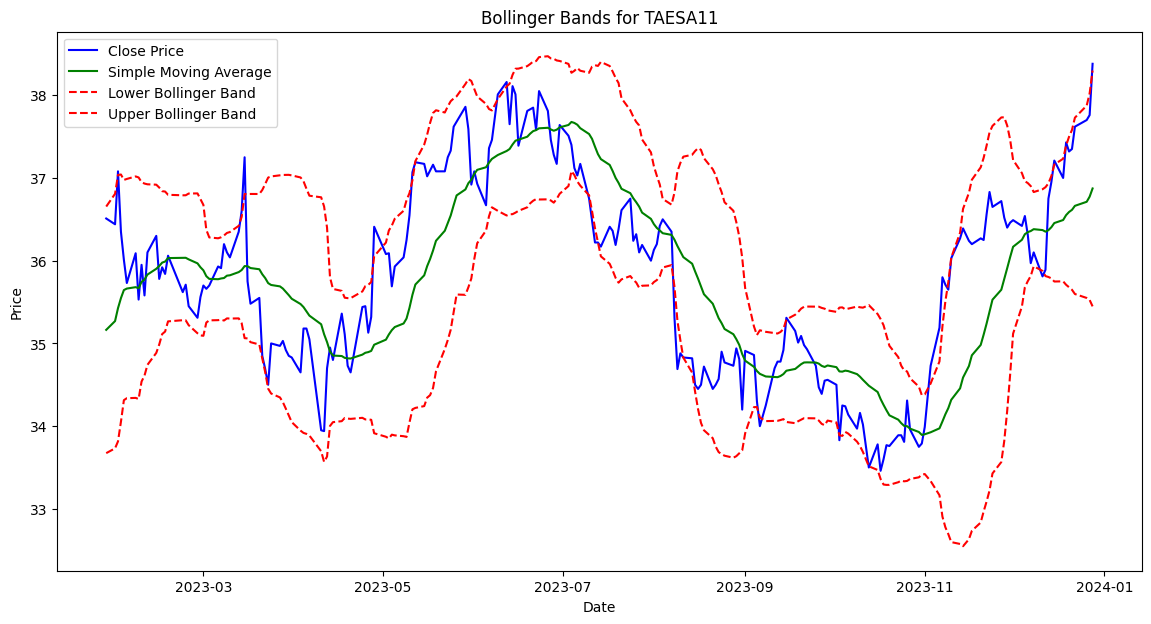

In [42]:
# Ensure your DataFrame is sorted by date if it's not already
analysis_2023.sort_index(inplace=True)

# Plotting
plt.figure(figsize=(14, 7))  # Set the figure size for better readability

# Plot closing price and Bollinger Bands
plt.plot(analysis_2023.index, analysis_2023['Close'], label='Close Price', color='blue')  # Closing price in blue
plt.plot(analysis_2023.index, analysis_2023['sma'], label='Simple Moving Average', color='green')  # SMA in green
plt.plot(analysis_2023.index, analysis_2023['lb'], label='Lower Bollinger Band', color='red', linestyle='--')  # Lower band in dashed red
plt.plot(analysis_2023.index, analysis_2023['ub'], label='Upper Bollinger Band', color='red', linestyle='--')  # Upper band in dashed red

plt.title('Bollinger Bands for TAESA11')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [43]:
# Calculate Volume

stock_info = yf.Ticker(ticker)
hist = stock_info.history(period='5d')
previus_average_volume = hist['Volume'].iloc[1:4:1].mean()
today_volume = hist['Volume'][-1]

if today_volume > previus_average_volume * 2:
    print('High volume')
else:
    pass



/var/folders/h3/hg0brw_s1mb4rb20y5dzl_sw0000gn/T/ipykernel_23385/1245428236.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  today_volume = hist['Volume'][-1]


YFNotImplementedError: Have not implemented fetching 'earnings' from Yahoo API

In [46]:
# Price per share by Earnings per share (P/E) ratio

#taesa11['P/E'] = taesa11['Adj Close']/

YFNotImplementedError: Have not implemented fetching 'earnings' from Yahoo API